In [2]:
import numpy as np
import matplotlib.pyplot as plt

path_tot = "/home/emanuele/LOKI-DAS/tests/array_3d_tot.npy"
path_sta = "/home/emanuele/LOKI-DAS/tests/array_3d_sta.npy"
path_ch = "/home/emanuele/LOKI-DAS/tests/array_3d_fiber.npy"

In [3]:
corrmatrix_tot = np.load(path_tot)
corrmatrix_sta = np.load(path_sta)
corrmatrix_ch = np.load(path_ch)

In [4]:
print(corrmatrix_sta[0,2,30])

9.004118406190454


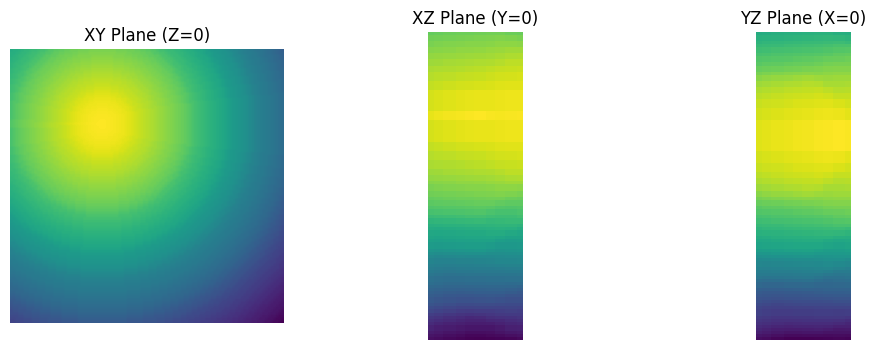

In [5]:

slice_xy = corrmatrix_sta[:, :, 0]  # Middle slice along Z-axis
slice_xz = corrmatrix_sta[:, 0, :]  # Middle slice along Y-axis
slice_yz = corrmatrix_sta[0, :, :]  # Middle slice along X-axis


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(slice_xy)
axes[0].set_title("XY Plane (Z=0)")


axes[1].imshow(slice_xz)
axes[1].set_title("XZ Plane (Y=0)")

axes[2].imshow(slice_yz)
axes[2].set_title("YZ Plane (X=0)")

for ax in axes:
    ax.axis("off")  # Hide axes for better visualization
    

plt.show()


In [6]:
import numpy as num

def coherence_plot(corrmatrix, xax, yax, zax, itrial, normalization=False):
    nx, ny, nz = num.shape(corrmatrix)
    CXY = num.zeros([ny, nx])
    for i in range(ny):
        for j in range(nx):
            CXY[i,j]=num.max(corrmatrix[j,i,:])

    CXZ = num.zeros([nz, nx])
    for i in range(nz):
        for j in range(nx):
            CXZ[i, j] = num.max(corrmatrix[j,:,i])

    CYZ = num.zeros([nz, ny])
    for i in range(nz):
        for j in range(ny):
            CYZ[i, j] = num.max(corrmatrix[:, j, i])

    if normalization:
        nrm = Normalize(vmin=0., vmax=1.)
    else:
        nrm = None


    xticks=num.min(xax)+num.arange(6)*(num.max(xax)-num.min(xax))/5
    yticks=num.min(yax)+num.arange(6)*(num.max(yax)-num.min(yax))/5
    zticks=num.min(zax)+num.arange(6)*(num.max(zax)-num.min(zax))/5

    fig, axs = plt.subplots(1,3, figsize=(15, 7.5))
    fig.suptitle('Coherence matrices trial '+str(itrial), fontsize=14, fontweight='bold')
    cmap = plt.cm.get_cmap('viridis', 100)

    ax1 = axs[0]
    cs1=ax1.contourf(xax, yax, CXY, 20, cmap=cmap, norm=nrm)
    ax1.set_xticks(xticks)
    ax1.set_yticks(yticks)
    ax1.set_xlabel('X (km)')
    ax1.set_ylabel('Y (km)')
    ax1.set_aspect('auto')
    
    ax2 = axs[1]
    cs2=ax2.contourf(yax, zax, CYZ, 20, cmap=cmap, norm=nrm)
    ax2.set_xticks(yticks)
    ax2.set_yticks(zticks)
    ax2.set_xlabel('Y (km)')
    ax2.set_ylabel('Z (km)')
    ax2.set_aspect('auto')
    ax2.invert_yaxis()

    ax3 = axs[2]
    cs3=ax3.contourf(xax, zax, CXZ, 20, cmap=cmap, norm=nrm)
    ax3.set_xticks(xticks)
    ax3.set_yticks(zticks)
    ax3.set_xlabel('X (km)')
    ax3.set_ylabel('Z (km)')
    ax3.set_aspect('auto')
    ax3.invert_yaxis()
    

    cbar=plt.colorbar(cs1, ax=axs, orientation='horizontal', shrink=0.6)
    cbar.set_label('Coherence')


    

In [7]:
num.shape(corrmatrix_sta)

(101, 101, 31)

101 101 31


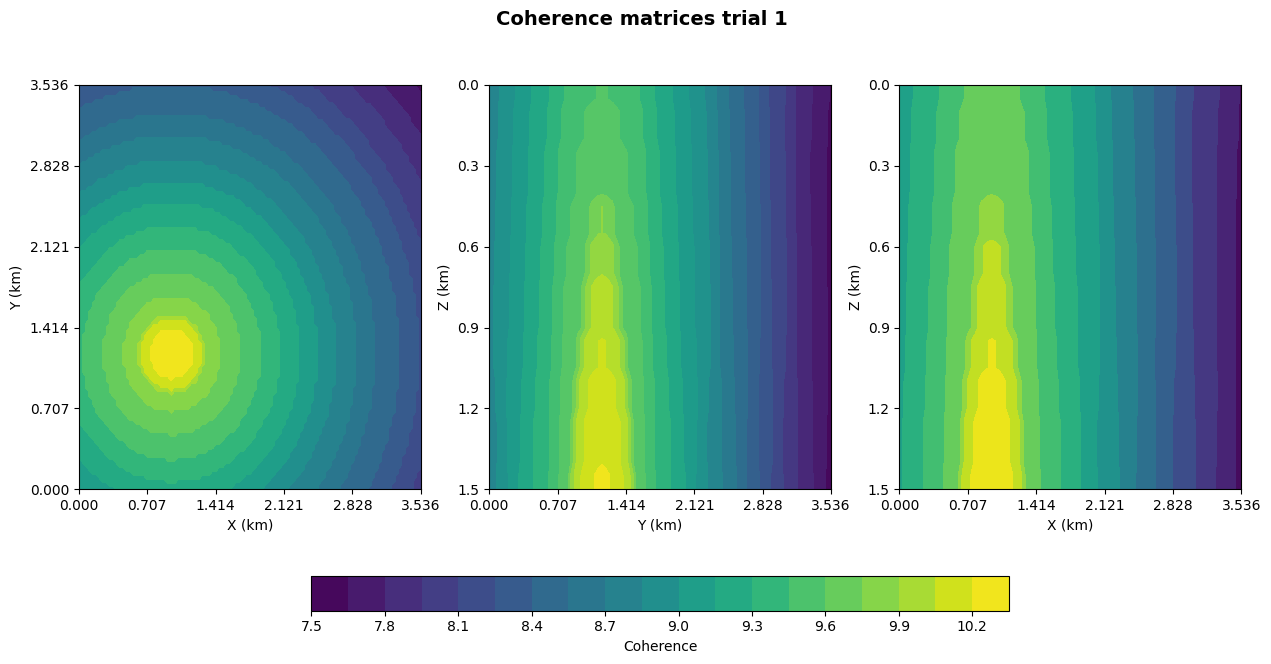

In [8]:
dx = 0.05
nx = 101
nz = 31
dz = 0.05

#nx, dx, nz, dz are referred to the diagonal of the domain 

x =  num.arange(0, (nx * dx) / num.sqrt(2), (dx / num.sqrt(2)))  #define the grid search based on the 2D traveltime grid
y =  num.arange(0, (nx * dx) / num.sqrt(2), (dx / num.sqrt(2)))  #define the grid search based on the 2D traveltime grid
z =  num.arange(0, (nz * dz) , dz) #define the grid search based on the 2D traveltime grid

#x = (num.arange(0,nx)*dx)  #define the grid search based on the 2D traveltime grid
#y = (num.arange(0,nx)*dx)  #define the grid search based on the 2D traveltime grid (cateto della diagonale)
#z = (num.arange(0,nz)*dz)  

print(len(x),len(y),len(z))
coherence_plot(corrmatrix_sta, x, y, z, itrial=1)
